<a href="https://colab.research.google.com/github/eulerianKnight/computer_vision/blob/main/case_study_for_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data
(X_train_cifar10, Y_train_cifar10), (X_test_cifar10, Y_test_cifar10) = keras.datasets.cifar10.load_data()

print(X_train_cifar10.shape)
print(Y_train_cifar10.shape)

# Create training and test split
X_valid_cifar10, X_train_cifar10 = X_train_cifar10[:5000]/255.0, X_train_cifar10[5000:]/255.0
Y_valid_cifar10, Y_train_cifar10 = Y_train_cifar10[:5000], Y_train_cifar10[5000:]

X_test_cifar10 = X_test_cifar10/255.0

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [3]:
# Get cifar100 dataset
(X_train_cifar100, Y_train_cifar100), (X_test_cifar100, Y_test_cifar100) = keras.datasets.cifar100.load_data()

print(X_train_cifar100.shape)
print(Y_train_cifar100.shape)

# Create training and validation set
X_valid_cifar100, X_train_cifar100 = X_train_cifar100[:5000]/255.0, X_train_cifar100[5000:]/255.0
Y_valid_cifar100, Y_train_cifar100 = Y_train_cifar100[:5000], Y_train_cifar100[5000:]

X_test_cifar100 = X_test_cifar100/255.0

169001437/169001437 [==============================] - 13s 0us/step
(50000, 32, 32, 3)
(50000, 1)


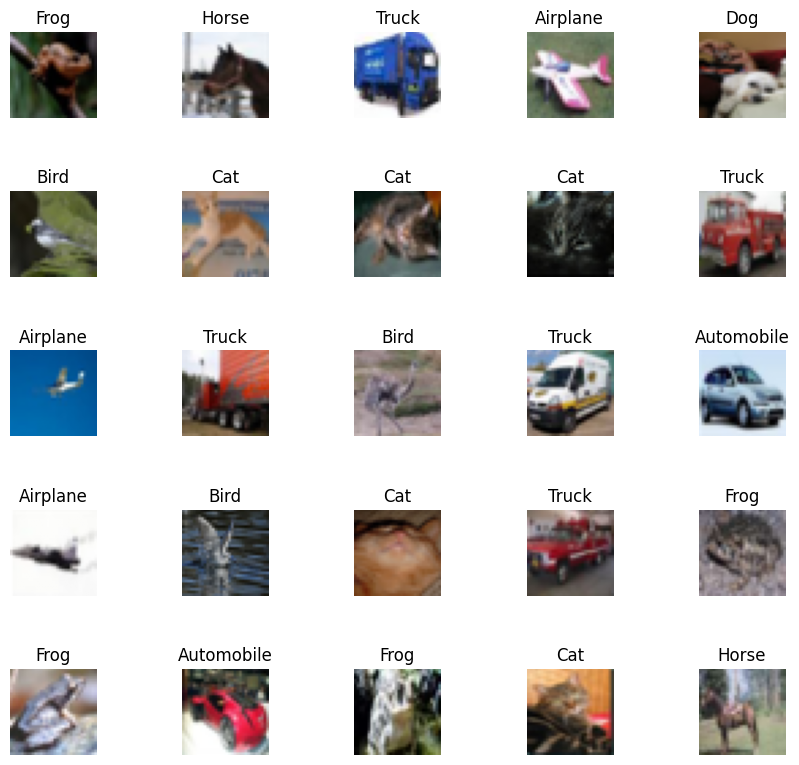

In [4]:
# Visualize Data
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
ax = ax.ravel()

# Label names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

for i in range(25):
    ax[i].imshow(X_train_cifar10[i])
    ax[i].set_title(class_names[Y_train_cifar10[i][0]])
    ax[i].axis('off')
    plt.subplots_adjust(wspace=1)

plt.show()

## A MultiLayer Perceptron for CIFAR10

In [5]:
checkpoint = keras.callbacks.ModelCheckpoint("simple_dnn.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
reduceLr = keras.callbacks.ReduceLROnPlateau()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(75), 

    keras.layers.Dense(50, activation='elu'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.1), 

    keras.layers.Dense(50, activation='elu'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.1), 

    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

history = model.fit(X_train_cifar10, 
                    Y_train_cifar10, 
                    epochs=60, 
                    validation_data=(X_valid_cifar10, Y_valid_cifar10), 
                    callbacks=[checkpoint, early_stopping, reduceLr])

Epoch 1/60
1407/1407 [==============================] - 14s 5ms/step - loss: 1.8262 - accuracy: 0.3499 - val_loss: 1.5921 - val_accuracy: 0.4272 - lr: 0.0010
Epoch 2/60
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6465 - accuracy: 0.4123 - val_loss: 1.5268 - val_accuracy: 0.4578 - lr: 0.0010
Epoch 3/60
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5870 - accuracy: 0.4357 - val_loss: 1.4860 - val_accuracy: 0.4732 - lr: 0.0010
Epoch 4/60
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5511 - accuracy: 0.4493 - val_loss: 1.4640 - val_accuracy: 0.4856 - lr: 0.0010
Epoch 5/60
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5226 - accuracy: 0.4574 - val_loss: 1.4555 - val_accuracy: 0.4806 - lr: 0.0010
Epoch 6/60
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4997 - accuracy: 0.4672 - val_loss: 1.4157 - val_accuracy: 0.4958 - lr: 0.0010
Epoch 7/60
1407/1407 [==============================] - 7

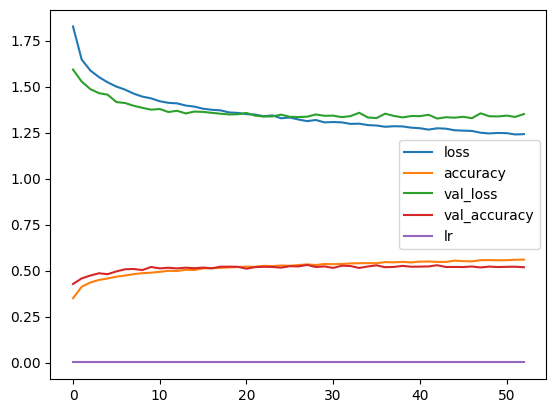

In [6]:
# Plot the results
pd.DataFrame(history.history).plot()
plt.show()

In [7]:
model.evaluate(X_test_cifar10, Y_test_cifar10)

313/313 [==============================] - 1s 2ms/step - loss: 1.3335 - accuracy: 0.5226


[1.3334749937057495, 0.522599995136261]

## A MultiLayer Perceptron CIFAR100

In [8]:
checkpoint = keras.callbacks.ModelCheckpoint('bigger_dense.h5', save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(restore_best_weights=True)
reducrLr = keras.callbacks.ReduceLROnPlateau(patience=9)

# Create the Model
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'), 

    keras.layers.Dense(128, activation='relu'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.1), 

    keras.layers.Dense(100, activation='softmax')
])

model_1.compile(loss='sparse_categorical_crossentropy', 
                optimizer=keras.optimizers.Adam(), 
                metrics=['accuracy'])

history = model_1.fit(X_train_cifar100, 
                      Y_train_cifar100, 
                      epochs=50, 
                      validation_data=(X_valid_cifar100, Y_valid_cifar100), 
                      callbacks=[checkpoint, early_stopping, reduceLr])

Epoch 1/50
1407/1407 [==============================] - 8s 4ms/step - loss: 3.8833 - accuracy: 0.1167 - val_loss: 3.5533 - val_accuracy: 0.1658 - lr: 0.0010
Epoch 2/50
1407/1407 [==============================] - 6s 4ms/step - loss: 3.4867 - accuracy: 0.1799 - val_loss: 3.3833 - val_accuracy: 0.1952 - lr: 0.0010
Epoch 3/50
1407/1407 [==============================] - 5s 4ms/step - loss: 3.3157 - accuracy: 0.2081 - val_loss: 3.2876 - val_accuracy: 0.2126 - lr: 0.0010
Epoch 4/50
1407/1407 [==============================] - 6s 4ms/step - loss: 3.1975 - accuracy: 0.2288 - val_loss: 3.2072 - val_accuracy: 0.2298 - lr: 0.0010
Epoch 5/50
1407/1407 [==============================] - 5s 4ms/step - loss: 3.0908 - accuracy: 0.2483 - val_loss: 3.1626 - val_accuracy: 0.2400 - lr: 0.0010
Epoch 6/50
1407/1407 [==============================] - 5s 4ms/step - loss: 3.0126 - accuracy: 0.2627 - val_loss: 3.1482 - val_accuracy: 0.2436 - lr: 0.0010
Epoch 7/50
1407/1407 [==============================] - 5s

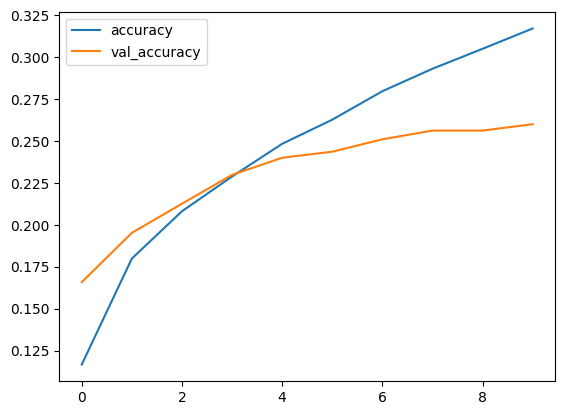

In [9]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.show()

In [10]:
model_1.evaluate(X_test_cifar100, Y_test_cifar100)

313/313 [==============================] - 1s 2ms/step - loss: 3.0953 - accuracy: 0.2621


[3.0953402519226074, 0.2621000111103058]

In [11]:
# Create a more complex model
checkpoint = keras.callbacks.ModelCheckpoint('bigger_dense_2.h5', save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(restore_best_weights=True)
reducrLr = keras.callbacks.ReduceLROnPlateau(patience=9)

model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'), 

    keras.layers.Dense(256, activation='relu'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.1), 

    keras.layers.Dense(128, activation='relu'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.1), 

    keras.layers.Dense(100, activation='softmax')
])

model_2.compile(loss='sparse_categorical_crossentropy', 
                optimizer=keras.optimizers.Adam(), 
                metrics=['accuracy'])

history = model_2.fit(X_train_cifar100, 
                      Y_train_cifar100, 
                      epochs=50, 
                      validation_data=(X_valid_cifar100, Y_valid_cifar100), 
                      callbacks=[checkpoint, early_stopping, reduceLr])

Epoch 1/50
1407/1407 [==============================] - 10s 5ms/step - loss: 3.9302 - accuracy: 0.1068 - val_loss: 3.6133 - val_accuracy: 0.1488 - lr: 0.0010
Epoch 2/50
1407/1407 [==============================] - 7s 5ms/step - loss: 3.5278 - accuracy: 0.1673 - val_loss: 3.3951 - val_accuracy: 0.1922 - lr: 0.0010
Epoch 3/50
1407/1407 [==============================] - 7s 5ms/step - loss: 3.3679 - accuracy: 0.1955 - val_loss: 3.2687 - val_accuracy: 0.2138 - lr: 0.0010
Epoch 4/50
1407/1407 [==============================] - 7s 5ms/step - loss: 3.2425 - accuracy: 0.2161 - val_loss: 3.1874 - val_accuracy: 0.2300 - lr: 0.0010
Epoch 5/50
1407/1407 [==============================] - 7s 5ms/step - loss: 3.1429 - accuracy: 0.2345 - val_loss: 3.1469 - val_accuracy: 0.2350 - lr: 0.0010
Epoch 6/50
1407/1407 [==============================] - 7s 5ms/step - loss: 3.0525 - accuracy: 0.2487 - val_loss: 3.1380 - val_accuracy: 0.2438 - lr: 0.0010
Epoch 7/50
1407/1407 [==============================] - 7

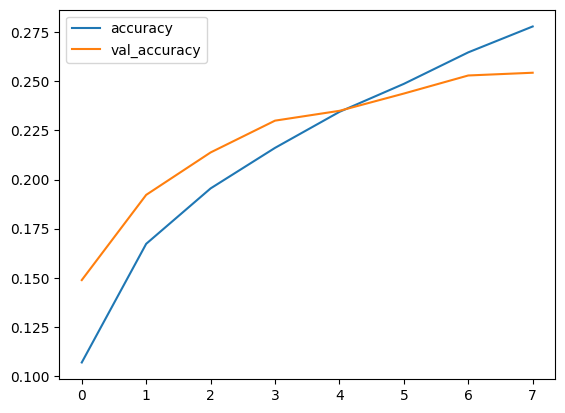

In [12]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.show()

In [13]:
model_1.summary()
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 batch_normalization_3 (Batc  (None, 3072)             12288     
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 256)               786688    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 128)              

## Using CNN to overfit CIFAR10

In [14]:
checkpoint = keras.callbacks.ModelCheckpoint('overcomplicated_cnn_cifar10.h5', 
                                             save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10, 
                                               restore_best_weights=True)
reduceLr = keras.callbacks.ReduceLROnPlateau()

model = keras.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 

    keras.layers.Conv2D(128, 2, activation='relu', padding='same'), 
    keras.layers.Conv2D(128, 2, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 

    keras.layers.Conv2D(256, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 

    keras.layers.Conv2D(512, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'), 
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(), 
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

history = model.fit(
    X_train_cifar10, 
    Y_train_cifar10, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_valid_cifar10, Y_valid_cifar10), 
    callbacks=[checkpoint])

Epoch 1/50
1407/1407 [==============================] - 30s 14ms/step - loss: 1.9147 - accuracy: 0.2019 - val_loss: 1.8159 - val_accuracy: 0.2332
Epoch 2/50
1407/1407 [==============================] - 20s 14ms/step - loss: 1.4451 - accuracy: 0.4437 - val_loss: 1.3743 - val_accuracy: 0.5388
Epoch 3/50
1407/1407 [==============================] - 20s 14ms/step - loss: 0.9481 - accuracy: 0.6646 - val_loss: 0.9897 - val_accuracy: 0.6560
Epoch 4/50
1407/1407 [==============================] - 20s 14ms/step - loss: 0.7199 - accuracy: 0.7495 - val_loss: 0.7913 - val_accuracy: 0.7362
Epoch 5/50
1407/1407 [==============================] - 20s 14ms/step - loss: 0.5694 - accuracy: 0.8028 - val_loss: 0.7226 - val_accuracy: 0.7592
Epoch 6/50
1407/1407 [==============================] - 20s 14ms/step - loss: 0.4346 - accuracy: 0.8509 - val_loss: 0.7889 - val_accuracy: 0.7402
Epoch 7/50
1407/1407 [==============================] - 20s 14ms/step - loss: 0.3221 - accuracy: 0.8894 - val_loss: 0.7035 -

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization_8 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       32896     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)      

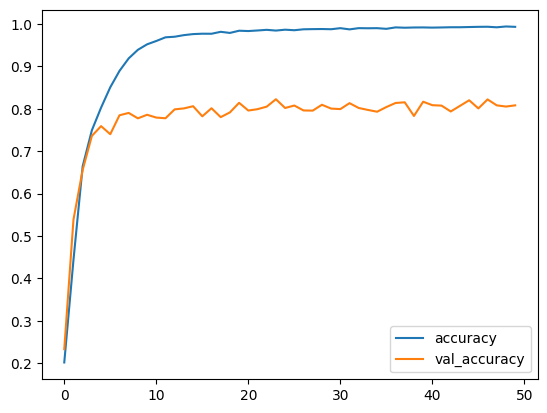

In [16]:
# Plot the progress
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.show()

## Simplifying CNN CIFAR10

In [17]:
checkpoint = keras.callbacks.ModelCheckpoint('simplified_cnn_cifar10.h5', 
                                             save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=25, 
                                               restore_best_weights=True)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=[32, 32, 3]), 
    keras.layers.Conv2D(32, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.4), 

    keras.layers.Conv2D(64, 2, activation='relu', padding='same'), 
    keras.layers.Conv2D(64, 2, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.2), 

    keras.layers.Conv2D(128, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.2), 

    keras.layers.Conv2D(256, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.2), 

    keras.layers.Flatten(), 
    keras.layers.Dense(32, activation='relu'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3), 
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_12 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)       

In [18]:
history = model.fit(
    X_train_cifar10, 
    Y_train_cifar10, 
    epochs=100, 
    batch_size=32, 
    validation_data=(X_valid_cifar10, Y_valid_cifar10), 
    callbacks=[checkpoint, early_stopping])

Epoch 1/100
1407/1407 [==============================] - 18s 9ms/step - loss: 1.5330 - accuracy: 0.4539 - val_loss: 1.1809 - val_accuracy: 0.5938
Epoch 2/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.0617 - accuracy: 0.6296 - val_loss: 0.9029 - val_accuracy: 0.6882
Epoch 3/100
1407/1407 [==============================] - 11s 8ms/step - loss: 0.8873 - accuracy: 0.6961 - val_loss: 0.8859 - val_accuracy: 0.6988
Epoch 4/100
1407/1407 [==============================] - 12s 8ms/step - loss: 0.7887 - accuracy: 0.7341 - val_loss: 0.7255 - val_accuracy: 0.7466
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 0.7053 - accuracy: 0.7645 - val_loss: 0.6722 - val_accuracy: 0.7670
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 0.6446 - accuracy: 0.7846 - val_loss: 0.6050 - val_accuracy: 0.7972
Epoch 7/100
1407/1407 [==============================] - 11s 8ms/step - loss: 0.5893 - accuracy: 0.8035 - val_loss: 0.7570 -

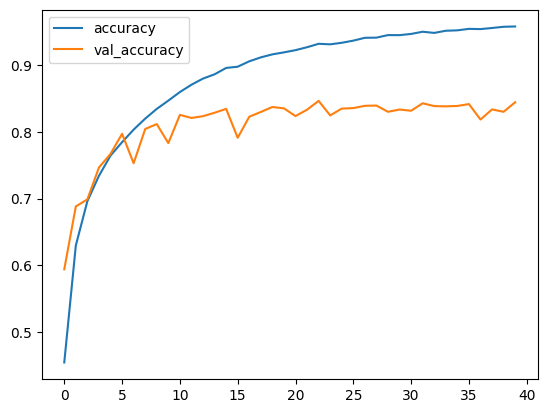

In [19]:
# Plot the learning
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.show()

In [20]:
model.evaluate(X_test_cifar10, Y_test_cifar10)

313/313 [==============================] - 1s 4ms/step - loss: 0.5992 - accuracy: 0.8154


[0.5991986393928528, 0.8154000043869019]

313/313 [==============================] - 1s 2ms/step


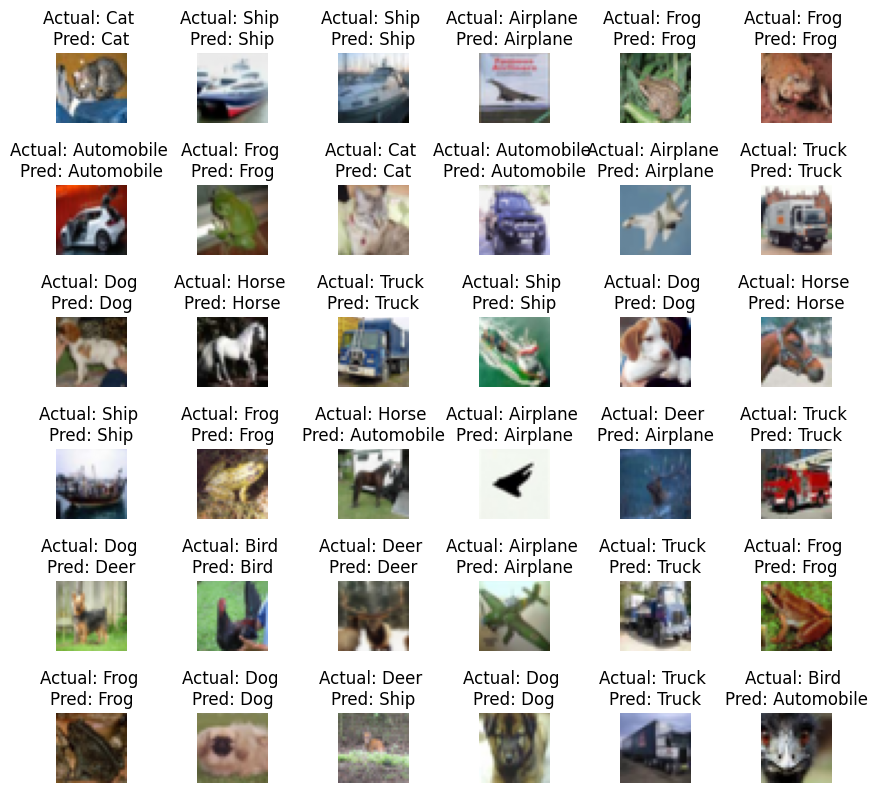

In [21]:
# Visualize Predictions
y_preds = model.predict(X_test_cifar10)

fig, ax = plt.subplots(6, 6, figsize=(10, 10))
ax = ax.ravel()

for i in range(0, 36):
    ax[i].imshow(X_test_cifar10[i])
    ax[i].set_title(f"Actual: {class_names[Y_test_cifar10[i][0]]} \nPred: {class_names[np.argmax(y_preds[i])]}")
    ax[i].axis('off')
    plt.subplots_adjust(wspace=1)

plt.show()

## Overfitting CNN CIFAR100

In [22]:
checkpoint = keras.callbacks.ModelCheckpoint('overcomplicated_cnn_model_cifar100.h5', 
                                             save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10, 
                                               restore_best_weights=True)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(l=0.01), padding='same', input_shape=[32, 32, 3]), 
    keras.layers.Conv2D(32, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 

    keras.layers.Conv2D(64, 2, activation='relu', padding='same'), 
    keras.layers.Conv2D(64, 2, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 

    keras.layers.Conv2D(128, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 

    keras.layers.Conv2D(256, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'), 
    keras.layers.BatchNormalization(), 

    keras.layers.Conv2D(512, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(512, 3, activation='relu', padding='same'), 
    keras.layers.BatchNormalization(), 

    keras.layers.Conv2D(1024, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(1024, 3, activation='relu', padding='same'), 
    keras.layers.BatchNormalization(), 

    keras.layers.Flatten(), 
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.BatchNormalization(), 

    keras.layers.Dense(100, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_17 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        8256      
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)       

In [23]:
history = model.fit(
    X_train_cifar100, 
    Y_train_cifar100, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_valid_cifar100, Y_valid_cifar100), 
    callbacks=[checkpoint]
)

Epoch 1/50
1407/1407 [==============================] - 57s 34ms/step - loss: 4.4656 - accuracy: 0.0620 - val_loss: 4.3288 - val_accuracy: 0.0694
Epoch 2/50
1407/1407 [==============================] - 48s 34ms/step - loss: 3.6671 - accuracy: 0.1326 - val_loss: 3.8506 - val_accuracy: 0.1288
Epoch 3/50
1407/1407 [==============================] - 48s 34ms/step - loss: 3.2272 - accuracy: 0.2012 - val_loss: 3.4574 - val_accuracy: 0.1886
Epoch 4/50
1407/1407 [==============================] - 48s 34ms/step - loss: 2.9030 - accuracy: 0.2599 - val_loss: 2.9494 - val_accuracy: 0.2518
Epoch 5/50
1407/1407 [==============================] - 48s 34ms/step - loss: 2.6160 - accuracy: 0.3155 - val_loss: 2.6588 - val_accuracy: 0.3018
Epoch 6/50
1407/1407 [==============================] - 48s 34ms/step - loss: 2.3607 - accuracy: 0.3726 - val_loss: 2.9543 - val_accuracy: 0.2708
Epoch 7/50
1407/1407 [==============================] - 49s 35ms/step - loss: 2.1398 - accuracy: 0.4224 - val_loss: 2.4474 -

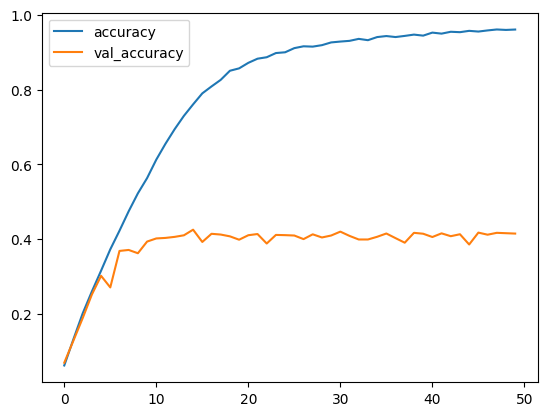

In [24]:
# Plot the result
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.show()

In [25]:
model.evaluate(X_test_cifar100, Y_test_cifar100)

313/313 [==============================] - 3s 10ms/step - loss: 4.1813 - accuracy: 0.4399


[4.181331634521484, 0.4399000108242035]

## Simplifying CNN CIFAR100

In [26]:
checkpoint = keras.callbacks.ModelCheckpoint('simplified_cnn_model.h5', 
                                             save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10, 
                                               restore_best_weights=True)

model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=[32, 32, 3]), 
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.4), 

    keras.layers.Conv2D(128, 2, activation='relu', padding='same'), 
    keras.layers.Conv2D(128, 2, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.2), 

    keras.layers.Conv2D(256, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.2), 

    keras.layers.Flatten(), 
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3), 
    keras.layers.Dense(100, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(weight_decay=0.0015), 
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_25 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 128)      

In [27]:
history = model.fit(X_train_cifar100, 
                    Y_train_cifar100, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_valid_cifar100, Y_valid_cifar100), 
                    callbacks=[checkpoint, early_stopping])

Epoch 1/100
1407/1407 [==============================] - 20s 11ms/step - loss: 3.9004 - accuracy: 0.1141 - val_loss: 3.5545 - val_accuracy: 0.1634
Epoch 2/100
1407/1407 [==============================] - 15s 11ms/step - loss: 3.1109 - accuracy: 0.2364 - val_loss: 2.8431 - val_accuracy: 0.2884
Epoch 3/100
1407/1407 [==============================] - 15s 11ms/step - loss: 2.6588 - accuracy: 0.3237 - val_loss: 2.5379 - val_accuracy: 0.3428
Epoch 4/100
1407/1407 [==============================] - 15s 11ms/step - loss: 2.3561 - accuracy: 0.3827 - val_loss: 2.3805 - val_accuracy: 0.3692
Epoch 5/100
1407/1407 [==============================] - 15s 11ms/step - loss: 2.1641 - accuracy: 0.4267 - val_loss: 2.3598 - val_accuracy: 0.3992
Epoch 6/100
1407/1407 [==============================] - 15s 11ms/step - loss: 2.0023 - accuracy: 0.4632 - val_loss: 2.2456 - val_accuracy: 0.4170
Epoch 7/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.8636 - accuracy: 0.4943 - val_loss: 1

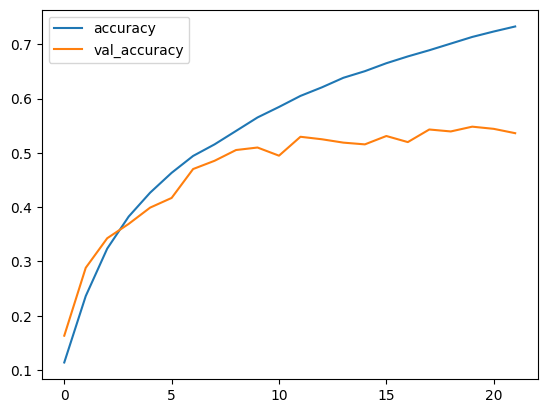

In [28]:
# Plot the learning
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.show()

In [29]:
# Evaluate model
model.evaluate(X_test_cifar100, Y_test_cifar100)

313/313 [==============================] - 1s 4ms/step - loss: 1.7312 - accuracy: 0.5354


[1.731171727180481, 0.5353999733924866]

## Data Augmentation

In [30]:
# Convert labels to categorical values
Y_train_cifar100 = keras.utils.to_categorical(Y_train_cifar100, 100)
Y_valid_cifar100 = keras.utils.to_categorical(Y_valid_cifar100, 100)
Y_test_cifar100 = keras.utils.to_categorical(Y_test_cifar100, 100)

In [32]:
# Create Data Generators
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(width_shift_range=0.1, 
                                   height_shift_range=0.1, 
                                   horizontal_flip=True)
valid_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train_cifar100, Y_train_cifar100, batch_size=32)
valid_generator = valid_datagen.flow(X_valid_cifar100, Y_valid_cifar100, batch_size=32)
test_generator = test_datagen.flow(X_test_cifar100, Y_test_cifar100, batch_size=32)

In [33]:
checkpoint = keras.callbacks.ModelCheckpoint('augmented_cnn_model.h5', 
                                             save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=25, 
                                               restore_best_weights=True)
reduceLr = keras.callbacks.ReduceLROnPlateau()

model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=[32, 32, 3]), 
    keras.layers.Conv2D(64, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.2), 

    keras.layers.Conv2D(128, 2, activation='relu', padding='same'), 
    keras.layers.Conv2D(128, 2, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.2), 

    keras.layers.Conv2D(256, 3, activation='relu', padding='same'), 
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.2), 

    keras.layers.Flatten(), 
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3), 
    keras.layers.Dense(100, activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy', keras.metrics.TopKCategoricalAccuracy(k=3)])

history = model.fit(
    train_generator, 
    epochs=150, 
    validation_data=valid_generator, 
    callbacks=[checkpoint, early_stopping, reducrLr])

Epoch 1/150
1407/1407 [==============================] - 28s 17ms/step - loss: 3.9011 - accuracy: 0.1104 - top_k_categorical_accuracy: 0.2317 - val_loss: 3.3764 - val_accuracy: 0.1882 - val_top_k_categorical_accuracy: 0.3634 - lr: 0.0010
Epoch 2/150
1407/1407 [==============================] - 24s 17ms/step - loss: 3.1783 - accuracy: 0.2205 - top_k_categorical_accuracy: 0.4121 - val_loss: 3.1023 - val_accuracy: 0.2546 - val_top_k_categorical_accuracy: 0.4284 - lr: 0.0010
Epoch 3/150
1407/1407 [==============================] - 24s 17ms/step - loss: 2.7826 - accuracy: 0.2972 - top_k_categorical_accuracy: 0.5017 - val_loss: 2.4325 - val_accuracy: 0.3644 - val_top_k_categorical_accuracy: 0.5832 - lr: 0.0010
Epoch 4/150
1407/1407 [==============================] - 24s 17ms/step - loss: 2.5582 - accuracy: 0.3422 - top_k_categorical_accuracy: 0.5599 - val_loss: 2.5377 - val_accuracy: 0.3582 - val_top_k_categorical_accuracy: 0.5678 - lr: 0.0010
Epoch 5/150
1407/1407 [=========================

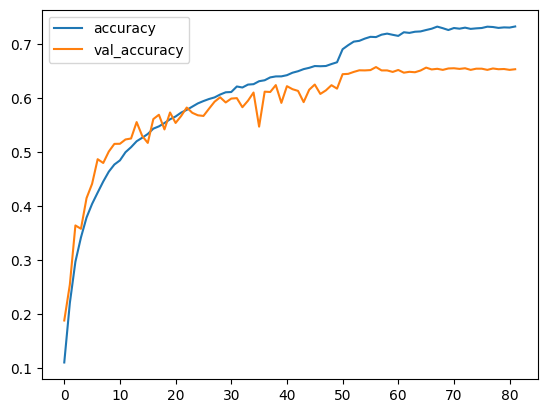

In [34]:
# Plot the progress
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.show()

In [35]:
model.evaluate(test_generator)

313/313 [==============================] - 1s 5ms/step - loss: 1.2477 - accuracy: 0.6639 - top_k_categorical_accuracy: 0.8428


[1.247693657875061, 0.6639000177383423, 0.8428000211715698]